In [1]:
import numpy as np
from scipy import linalg
import pandas as pd
from scipy.optimize import curve_fit
import sys 
sys.path.append('/home/svandersmagt/Energy_Landscape_dCas9/code_general/')
sys.path.append('../code_general/')
import read_model_ID as model
sys.path.append('../Diewertje/')
import Prepare_data as aba
reload(aba)
reload(model)
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()
import matplotlib.pylab as plt
import Nucleaseq_data_processing as proc
reload(proc)
import calculate_cleavage_rate as calc
reload(calc)

<module 'calculate_cleavage_rate' from 'calculate_cleavage_rate.pyc'>

In [2]:
filename_clv = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data_clv = '../data_nucleaseq_Finkelsteinlab/targetE/'
filename_aba = 'cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-20.csv'
path_to_data_aba = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'

xdata,ydata,yerr = proc.prepare_multiprocessing_combined_aba(filename_aba,filename_clv,path_to_data_aba,path_to_data_clv,False)

In [20]:
model_ID = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'; parnum = '44' 

filename = 'fit_13_6_2019_sim_2.txt'
path = '../fits_Stijn/13_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

print parameters[0]
parameters[0] = 1.4

model_ID_clv,model_ID_aba,parameters_clv,parameters_aba = model.combined_model(parameters,model_ID)

1.91173151627


0.9800013894575482


<Figure size 432x288 with 0 Axes>

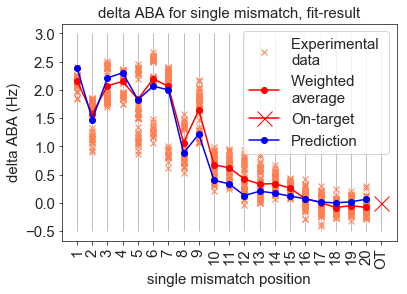

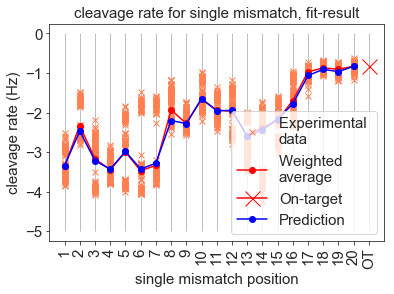

<Figure size 432x288 with 0 Axes>

In [21]:
aba = []
abafit = []
abacomp = []

clv = []
clvfit = []
clvcomp = []

concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300])#[0.1, 0.3, 1, 3, 10, 30, 100, 300]) # in nanoMolair
reference=10 # in nanomolair
ontarget_aba = calc.calc_ABA(parameters_aba,concentrations,reference,[],model_ID_aba)
print ontarget_aba

pos = 1
while pos<21:
    for i in range(len(xdata)):
        if len(xdata[i])==1 and xdata[i][0]==pos:
            pos += 1
            aba.append(np.average(ydata[i][1],weights=np.reciprocal(yerr[i][1])**2))
            abacomp.append(ydata[i][1])
            abafit.append(calc.calc_clv_aba(parameters,model_ID,[pos-1],20,concentrations,reference,ontarget_aba)[1])
            
            clv.append(np.average(ydata[i][0],weights=np.reciprocal(yerr[i][0])**2))
            clvcomp.append(ydata[i][0])
            clvfit.append(np.log10(calc.calc_clv_aba(parameters,model_ID,[pos-1],20,concentrations,reference,ontarget_aba)[0]))

otclv = np.log10(calc.calc_clv_aba(parameters,model_ID,[],20,concentrations,reference,ontarget_aba)[0])

for i in range(20):
    #print len(datacompclv[i])
    plot1, = plt.plot((i+1)*np.ones(len(abacomp[i])),abacomp[i],marker='x',color='coral',linewidth=0,label='Experimental \ndata')
plot2, = plt.plot(range(1,21),aba,marker='o',color='r',label='Weighted \naverage')
plot3, = plt.plot(21,0.0,marker='x',color='r',markersize=15,label='On-target')
plot4, = plt.plot(range(1,21),abafit,marker='o',color='b',label='Prediction')
plt.legend(handles=[plot1,plot2,plot3,plot4],fontsize=15)
plt.xlabel('single mismatch position', fontsize=15)
plt.ylabel('delta ABA (Hz)', fontsize=15)
plt.title('delta ABA for single mismatch, fit-result', fontsize=15)
plt.xticks(range(1,21)+[21],range(1,21)+['OT'],fontsize=15,rotation='vertical')
plt.yticks(fontsize=15)
plt.vlines(range(1,22),-0.5,3.,color='grey',linewidth=0.5);

plt.figure()
for i in range(20):
    #print len(datacompclv[i])
    plot1, = plt.plot((i+1)*np.ones(len(clvcomp[i])),clvcomp[i],marker='x',color='coral',linewidth=0,label='Experimental \ndata')
plot2, = plt.plot(range(1,21),clv,marker='o',color='r',label='Weighted \naverage')
plot3, = plt.plot(21,otclv,marker='x',color='r',markersize=15,label='On-target')
plot4, = plt.plot(range(1,21),clvfit,marker='o',color='b',label='Prediction')
plt.legend(handles=[plot1,plot2,plot3,plot4],fontsize=15)
plt.xlabel('single mismatch position', fontsize=15)
plt.ylabel('cleavage rate (Hz)', fontsize=15)
plt.title('cleavage rate for single mismatch, fit-result', fontsize=15)
plt.xticks(range(1,21)+[21],range(1,21)+['OT'],fontsize=15,rotation='vertical')
plt.yticks(fontsize=15)
plt.vlines(range(1,22),-5.,0.,color='grey',linewidth=0.5);

plt.figure()

0.9800013894575482


Text(0.5,1,'delta ABA double mismatches')

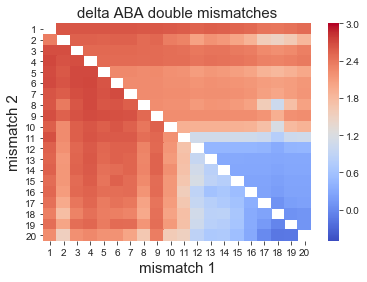

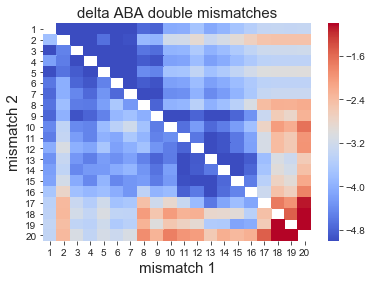

In [22]:
aba_double = np.zeros([20,20])
clv_double = np.zeros([20,20])

concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300])#[0.1, 0.3, 1, 3, 10, 30, 100, 300]) # in nanoMolair
reference=10 # in nanomolair
ontarget_aba = calc.calc_ABA(parameters_aba,concentrations,reference,[],model_ID_aba)
print ontarget_aba

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        aba_double[j-1,i-1] = np.average(ydata[a][1],weights=np.reciprocal(yerr[a][1])**2)
        clv_double[i-1,j-1], aba_double[i-1,j-1] = calc.calc_clv_aba(parameters,model_ID,[i,j],20,concentrations,reference,ontarget_aba)
        clv_double[j-1,i-1] = np.average(ydata[a][0],weights=np.reciprocal(yerr[a][0])**2)
        clv_double[i-1,j-1] = np.log10(clv_double[i-1,j-1])
        
for a in range(20):
    aba_double[a,a] = np.nan
    clv_double[a,a] = np.nan
        
aba_double_df = pd.DataFrame(aba_double, index=range(1, 21), columns=range(1, 21))
clv_double_df = pd.DataFrame(clv_double, index=range(1, 21), columns=range(1, 21))

plt.figure()
sns.heatmap(aba_double_df, cmap='coolwarm', cbar=True, vmin=-0.5, vmax = 3.)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('delta ABA double mismatches', fontsize=15)

plt.figure()
sns.heatmap(clv_double_df, cmap='coolwarm', cbar=True, vmin=-5., vmax = -1.)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)
plt.title('delta ABA double mismatches', fontsize=15)

In [23]:
chi = 0.0
ontarget_aba = calc.calc_ABA(parameters_aba,concentrations,reference,[],model_ID_aba)

perfectClv = np.float(len(ydata[0][0]))
#perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,0,1/singleOn,1/doubleOn]

for i in range(len(xdata)):
    chi += calc.calc_chi_squared(parameters,xdata[i],ydata[i],yerr[i],chi_weights,False,False,True,20,model_ID,np.array([1,30,100]),10,ontarget_aba)
print chi

176.86234100983205


In [7]:
filename_abaD = 'cas9-target-d-replicate-1-delta-abas-processed.csv'
path_to_data_aba = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'

data = pd.read_csv(path_to_data_aba + filename_abaD)

data.rename(columns = {'Sequence':'#_Sequence'}, inplace = True)
data = data[data['Length difference']==0]
data = data[data.Canonical==True]
data = data[data['Mutation Count']<3.]
data['Mutation Positions'] = data['Mutation ID'].apply(lambda x: '|'.join(map(lambda y: y.split(':')[1],x.split('|'))) if ((x!='')&(x!='OT')) else '')
data.head()

data.to_csv(path_to_data_aba + 'cas9-target-d-replicate-1-delta-abas_Canonical_OT-r_0-2.csv',index=False)

In [14]:
filename_abaE = 'cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-20.csv'
path_to_data_aba = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'

data = pd.read_csv(path_to_data_aba + filename_abaE)

data = data[data.Canonical==True]
data = data[data['Mutation Count']<3.]
data.head()

#data.to_csv(path_to_data_aba + 'cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv',index=False)

,# Sequence,Delta ABA (kBT),Uncertainty,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
0,TTTAGACCCATAAAGATAAGACGCTGG,2.127065,0.042464,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||.|||||||||.|||\r...,CGCAGAG-TAGAAATACGC-AG\r\n|||||| ||||||||| | ...,r:7:A|r:17:C,r,2.0,7|17
1,TTTAGACGCTTAAAGATGAGAGGCTGG,2.611770,0.039588,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||.|||||||||||.|||||\r...,CGC-AGAGTAGAAATA-CGCAG\r\n|| ||||||||||| |||...,r:3:G|r:15:T,r,2.0,3|15
2,TTTAGACGCATTAGGATGAGACGCTGG,1.330186,0.046995,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||.|.|||||||\r...,CGCAGAGTAGAA-AT-ACGCAG\r\n|||||||||| || ||||...,r:11:G|r:13:T,r,2.0,11|13
4,TTTAGGCGCATAAAGATGGGACGCTGG,1.706772,0.044205,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n|||||.||||||||||||.|\r...,CGCAGAG-TAGAAATACGCAG-\r\n||||| | ||||||||||| ...,r:6:G|r:19:G,r,2.0,6|19
5,TTTAGACGCATAAACATGACACGCTGG,2.612995,0.048553,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||.||||.||||||||||\r...,CGCAG-AGTAG-AAATACGCAG\r\n|||| |||| ||||||||...,r:5:C|r:10:C,r,2.0,5|10


In [60]:
filename_abaE = 'TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv'
path_to_data_aba = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'

data = pd.read_csv(path_to_data_aba + filename_abaE)

data = data[data.Canonical==True]
data = data[data['Mutation Count']<3.]
print len(data)
data = data[data['error']>10**-5]
print len(data)
data.head()


#Grouped = data.groupby('Mutation Positions').agg(lambda x: list(x))
#Grouped.reset_index(inplace=True)

#for i in range(len(Grouped)):
#    s=Grouped['Mutation Positions'][i]
#    Grouped['Mutation Positions list'] = Grouped['Mutation Positions'].apply(
#    lambda x: map(int, x.split('|')) if not x == '' else [])
    

#MMpos=Grouped['Mutation Positions list'].tolist()
#ABA=Grouped['ABA'].tolist()
#Uncertainty=Grouped['error'].tolist()

#print MMpos

data.to_csv(path_to_data_aba + 'TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv',index=False)

2911
2906


In [61]:
filename_abaE = 'TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv'
path_to_data_aba = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'

filename_clv = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_clv = '../' + '/data_nucleaseq_Finkelsteinlab/targetE/'

xdata,ydata,yerr = proc.prepare_multiprocessing_combined_aba(filename_abaE,filename_clv,path_to_data_aba,path_clv,True)

perfectClv = np.float(len(ydata[0][0]))
perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]
initial_guess =  [2.]  + [0.]*20    + [5.]*20  + [-2.5]  + [2.]  + [1.]

filename = 'fit_13_6_2019_sim_2.txt'
path = '../fits_Stijn/13_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter 44']
final_par_np = np.array(final_par.values)

mid = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'
conc = np.array([1,30,100])
ref = 10

chi = 0.0
for i in range(len(xdata)):
    chi += calc.calc_chi_squared(initial_guess,xdata[i],ydata[i],yerr[i],chi_weights,combined_CHAMP=True,model_id=mid,concentrations=conc,reference=ref)
print chi

chi = 0.0
for i in range(len(xdata)):
    chi += calc.calc_chi_squared(final_par_np,xdata[i],ydata[i],yerr[i],chi_weights,combined_CHAMP=True,model_id=mid,concentrations=conc,reference=ref)
print chi

print ydata[0][1]
print yerr[0][1]

99265.11936125254
98660.91902209596
[2.5544759139089868]
[0.0033034569901992158]


[0.05, 350, -0.1, 1.1]

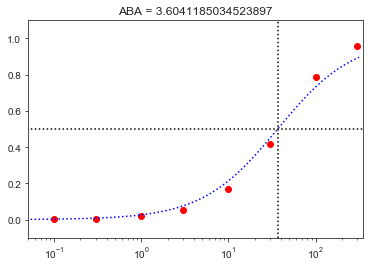

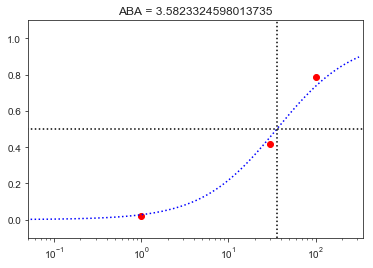

In [83]:
from scipy.optimize import curve_fit
def Hill_eq(C, Kd):
    return (1.0+Kd/C)**(-1)

filename = 'fit_17_7_2019_sim_3.txt'
path = '../fits_Stijn/17_7_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter 44']
parameters = np.array(final_par.values)

mid = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'
concentrations = np.array([0.1, 0.3, 1., 3., 10., 30., 100., 300.])
reference = 10.
mismatch_positions = [8]
guide_length = 20

model_id_clv,model_id_aba,parameters_clv,parameters_aba = model.combined_model(parameters,mid)
matrix_clv, matrix_aba = calc.get_master_equation_clv_aba(parameters,mismatch_positions,mid,guide_length)

T = 600
rel_concentration = concentrations/reference
everything_unbound = np.array([1.0] + [0.0] * (guide_length + 1))
Pbound = []
for c in rel_concentration:
    new_rate_matrix = matrix_aba.copy()
    new_rate_matrix[0][0] *= c
    new_rate_matrix[1][0] *= c
    Probability = calc.get_Probability(new_rate_matrix, everything_unbound, T)
    Pbound.append(np.sum(Probability[1:]))
Pbound = np.array(Pbound)
conc3=False
if(conc3==False):
    Kd, _ = curve_fit(Hill_eq, concentrations,Pbound,maxfev=10000)
#print('at the end', concentrations)
if(conc3==True):
    Kd, _ = curve_fit(Hill_eq, concentrations,Pbound,maxfev=1000)
    if(Kd[0]<0): 
        Kd[0]=0.0001
aba = np.log(Kd)

plt.semilogx(concentrations,Pbound,'ro')
plt.plot(np.logspace(-1.5,2.5,1000),Hill_eq(np.logspace(-1.5,2.5,1000),Kd[0]),'b:')
plt.title('ABA = ' + str(aba[0]))
plt.plot([Kd[0],Kd[0]],[-0.1,1.1],'k:')
plt.plot([0,350],[0.5,0.5],'k:')
plt.axis([0.05,350,-0.1,1.1])

concentrations = np.array([1.,30.,100.])
T = 600
rel_concentration = concentrations/reference
everything_unbound = np.array([1.0] + [0.0] * (guide_length + 1))
Pbound = []
for c in rel_concentration:
    new_rate_matrix = matrix_aba.copy()
    new_rate_matrix[0][0] *= c
    new_rate_matrix[1][0] *= c
    Probability = calc.get_Probability(new_rate_matrix, everything_unbound, T)
    Pbound.append(np.sum(Probability[1:]))
Pbound = np.array(Pbound)
conc3=False
if(conc3==False):
    Kd, _ = curve_fit(Hill_eq, concentrations,Pbound,maxfev=10000)
#print('at the end', concentrations)
if(conc3==True):
    Kd, _ = curve_fit(Hill_eq, concentrations,Pbound,maxfev=1000)
    if(Kd[0]<0): 
        Kd[0]=0.0001
aba = np.log(Kd)

plt.figure()
plt.semilogx(concentrations,Pbound,'ro')
plt.plot(np.logspace(-1.5,2.5,1000),Hill_eq(np.logspace(-1.5,2.5,1000),Kd[0]),'b:')
plt.plot([Kd[0],Kd[0]],[-0.1,1.1],'k:')
plt.plot([0,350],[0.5,0.5],'k:')
plt.title('ABA = ' + str(aba[0]))
plt.axis([0.05,350,-0.1,1.1])


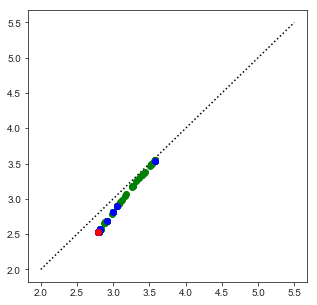

In [92]:
filename = 'fit_18_7_2019_sim_2.txt'
path = '../fits_Stijn/18_7_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter 44']
parameters = np.array(final_par.values)

mid = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'
concentrations8 = np.array([0.1, 0.3, 1., 3., 10., 30., 100., 300.])
concentrations3 = np.array([1.,30.,100.]) # using less concentrations has an effect on the prediction
reference = 10.
guide_length = 20


_,OT8 = calc.calc_clv_aba(parameters,mid,[],guide_length,concentrations8,reference)
_,OT3 = calc.calc_clv_aba(parameters,mid,[],guide_length,concentrations3,reference)

single8 = []
single3 = []
for i in range(1,21):
    single8.append(calc.calc_clv_aba(parameters,mid,[i],guide_length,concentrations8,reference)[1])
    single3.append(calc.calc_clv_aba(parameters,mid,[i],guide_length,concentrations3,reference)[1])
    
double8 = []
double3 = []
for i in range(1,20):
    for j in range(i+1,21):
        double8.append(calc.calc_clv_aba(parameters,mid,[i,j],guide_length,concentrations8,reference)[1])
        double3.append(calc.calc_clv_aba(parameters,mid,[i,j],guide_length,concentrations3,reference)[1])
        
plt.figure(figsize=[5,5])
plt.plot([2.,5.5],[2.,5.5],'k:')
plt.plot(double8,double3,'go')
plt.plot(single8,single3,'bo')
plt.plot(OT8,OT3,'ro')
